## Example
Consider the two tanks 

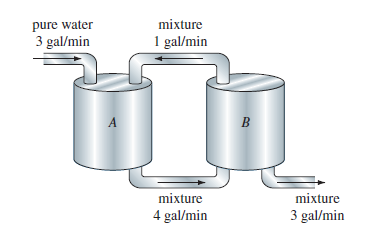. 

Let us suppose for the sake of discussion that tank A contains 50 gallons of water in which 25 pounds of salt is dissolved. Suppose tank B contains 50 gallons of pure water. Liquid is pumped into and out of the tanks as indicated in the figure; the mixture exchanged between the two tanks and the liquid pumped out of tank B are assumed to be well stirred. We wish to construct a mathematical model that describes the number of pounds $x_1(t)$ and $x_2(t)$ of salt in tanks A and B, respectively, at time $t$.

We obtain the linear system
$$ \dfrac{dx_1}{dt}=-\dfrac{2}{25}x_1+\dfrac{1}{50}x_2$$
$$ \dfrac{dx_2}{dt}=\dfrac{2}{25}x_1-\dfrac{2}{25}x_2$$
with $x_1(0)=25$ and $x_2(0)=0$.


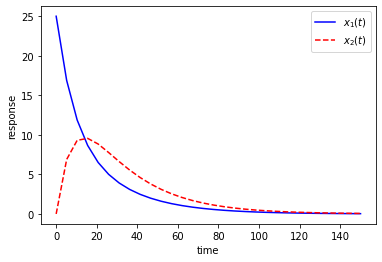

In [66]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    dxdt = (-2/25)*z[0]+(1/50)*z[1]
    dydt = (2/25)*z[0]-(2/25)*z[1]
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [25,0]

# time points
t = np.linspace(0,150,30)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b-',label=r'$x_1(t)$')
plt.plot(t,z[:,1],'r--',label=r'$x_2(t)$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

### Explicit solution
$$x_1(t)=\dfrac{25}{2}\left[e^{-t/25}+e^{-3t/25}\right]$$
$$x_2(t)=25\left[e^{-t/25}-e^{-3t/25}\right]$$

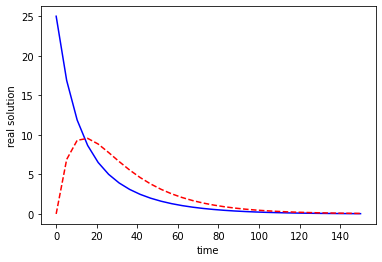

In [67]:
import numpy as np
# time points
t = np.linspace(0,150,30)
x_1 = 25/2*(np.exp(-t/25)+np.exp(-3*t/25))
x_2 = 25*(np.exp(-t/25)-np.exp(-3*t/25))
# plot results
plt.plot(t,x_1,'b-',label=r'$x_1(t)$')
plt.plot(t,x_2,'r--',label=r'$x_2(t)$')
plt.ylabel('real solution')
plt.xlabel('time')
plt.show()

In [5]:
# Libraries
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def f(xs, t, ps):
    try:
        a = ps['a'].value
        b = ps['b'].value
        c = ps['c'].value
        d = ps['d'].value
    except:
        a, b, c, d = ps
    x = xs[0]
    y = xs[1]
    return [a*x + b*y, c*x + d*y]

def g(t, x0, ps):
    #Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    x = odeint(f, x0, t, args=(ps,))
    return x

def residual(ps, ts, data):
    z0 = [ps['x0'].value,ps['y0'].value]
    model = g(ts, z0, ps)
    return (model - data).ravel()

In [68]:
t = np.linspace(0,150,30)
a = -2/25 #-0.08
b = 1/50 #0.02
c = 2/25 #0.08
d = -2/25 #-0.08
true_params = [a, b, c, d]
z0 = [25, 0]
data = g(t, z0, true_params)

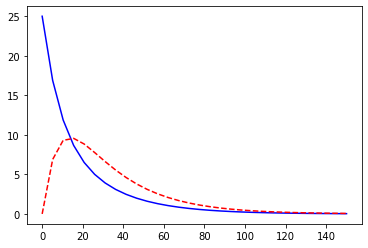

In [69]:
plt.plot(t,data[:,0],'b-')
plt.plot(t,data[:,1],'r--')
plt.show()

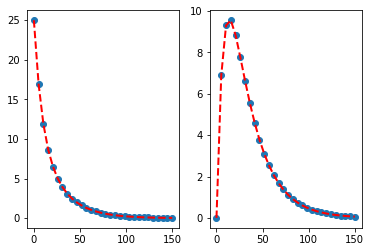

In [97]:
# set parameters incluing bounds
params = Parameters()
params.add('x0', value=float(data[0,1]), min=25, max=25.00001)
params.add('y0', value=float(data[0,0]), min=0, max=0.00001)
params.add('a', value= -1, min=-1, max=1)
params.add('b', value= 1, min=-1, max=1)
params.add('c', value= 1, min=-1, max=1)
params.add('d', value= -1, min=-1, max=1)

# fit model and find predicted values
result = minimize(residual, params, args=(t, data), method='leastsq',max_nfev = 10000)
final = data + result.residual.reshape(data.shape)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(t, data[:,0], 'o')
ax1.plot(t, final[:,0], '--', linewidth=2, c='red');
ax2.plot(t, data[:,1], 'o')
ax2.plot(t, final[:,1], '--', linewidth=2, c='red');
plt.show()

In [96]:
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 619
    # data points      = 60
    # variables        = 6
    chi-square         = 72.4908346
    reduced chi-square = 1.34242286
    Akaike info crit   = 23.3469343
    Bayesian info crit = 35.9130017
##  Warning: uncertainties could not be estimated:
    x0:  at initial value
    x0:  at boundary
[[Variables]]
    x0:  25.0000000 (init = 25)
    y0:  9.8109e-06 (init = 1e-05)
    a:  -0.51915507 (init = -0.5)
    b:   0.54639009 (init = 1)
    c:   0.77779021 (init = 1)
    d:  -0.91452393 (init = -1)
